# Summary Statistics

In [63]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt

excess_ret = pd.read_excel("multi_asset_etf_data.xlsx", sheet_name="excess returns").drop("QAI", axis=1).drop("Date", axis=1)

annual_mean = excess_ret.mean() * 12
annual_vol = np.sqrt(excess_ret.var() * 12)
sharpe = annual_mean/annual_vol
print("Annualized Mean of Excess Returns")
display(annual_mean)
print("Annualized Volatility of Excess Returns")
display(annual_vol)
print("Annualized Sharpe Ratio")
display(sharpe)

Annualized Mean of Excess Returns


BWX   -0.007716
DBC   -0.005292
EEM    0.029339
EFA    0.061775
HYG    0.041371
IEF    0.016404
IYR    0.074916
PSP    0.092561
SPY    0.128141
TIP    0.020502
dtype: float64

Annualized Volatility of Excess Returns


BWX    0.082789
DBC    0.166553
EEM    0.176164
EFA    0.150903
HYG    0.075928
IEF    0.063442
IYR    0.168675
PSP    0.213370
SPY    0.142839
TIP    0.051115
dtype: float64

Annualized Sharpe Ratio


BWX   -0.093202
DBC   -0.031774
EEM    0.166542
EFA    0.409372
HYG    0.544873
IEF    0.258569
IYR    0.444143
PSP    0.433804
SPY    0.897103
TIP    0.401091
dtype: float64

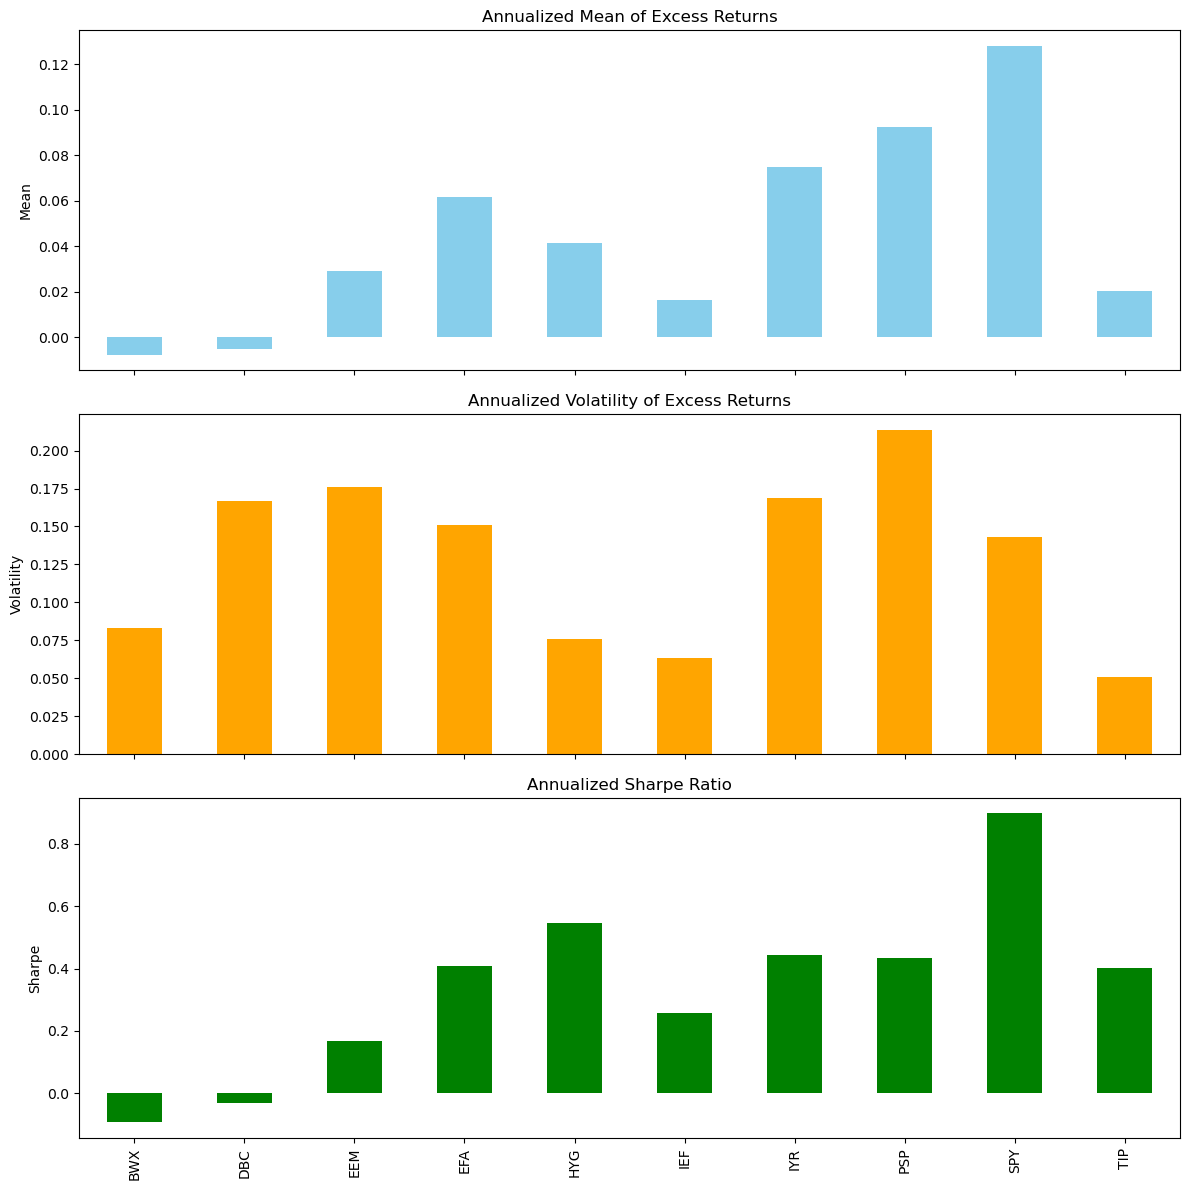

In [64]:
summary = pd.DataFrame({
    "Annual Mean": annual_mean,
    "Annual Volatility": annual_vol,
    "Sharpe Ratio": sharpe
})

fig, axes = plt.subplots(3, 1, figsize=(12, 12), sharex=True)

summary["Annual Mean"].plot(kind="bar", ax=axes[0], color="skyblue")
axes[0].set_title("Annualized Mean of Excess Returns")
axes[0].set_ylabel("Mean")

summary["Annual Volatility"].plot(kind="bar", ax=axes[1], color="orange")
axes[1].set_title("Annualized Volatility of Excess Returns")
axes[1].set_ylabel("Volatility")

summary["Sharpe Ratio"].plot(kind="bar", ax=axes[2], color="green")
axes[2].set_title("Annualized Sharpe Ratio")
axes[2].set_ylabel("Sharpe")

plt.tight_layout()
plt.show()

SPY and HYG have the highest annualized sharpe ratios (0.897 and 0.545 respectively). Both BWX and DBC failed to exceed our risk-free rate, with sharpe ratios of -0.093 and -0.032 respectively

# Descriptive Analysis

In [65]:
corr = excess_ret.corr()
display(corr)

,BWX,DBC,EEM,EFA,HYG,IEF,IYR,PSP,SPY,TIP
BWX,1.000000,0.191116,0.621673,0.602820,0.602555,0.580891,0.552557,0.526692,0.439994,0.675151
DBC,0.191116,1.000000,0.511667,0.500922,0.461887,-0.300207,0.280518,0.453303,0.432162,0.109006
EEM,0.621673,0.511667,1.000000,0.819925,0.691167,0.026704,0.584063,0.750109,0.687751,0.378792
EFA,0.602820,0.500922,0.819925,1.000000,0.787191,0.042639,0.699292,0.895320,0.845863,0.394821
HYG,0.602555,0.461887,0.691167,0.787191,1.000000,0.187258,0.739356,0.812157,0.793518,0.538648
IEF,0.580891,-0.300207,0.026704,0.042639,0.187258,1.000000,0.316532,0.022436,0.000815,0.754102
IYR,0.552557,0.280518,0.584063,0.699292,0.739356,0.316532,1.000000,0.749836,0.754711,0.598742
PSP,0.526692,0.453303,0.750109,0.895320,0.812157,0.022436,0.749836,1.000000,0.891687,0.408005
SPY,0.439994,0.432162,0.687751,0.845863,0.793518,0.000815,0.754711,0.891687,1.000000,0.381625
TIP,0.675151,0.109006,0.378792,0.394821,0.538648,0.754102,0.598742,0.408005,0.381625,1.000000


,BWX,DBC,EEM,EFA,HYG,IEF,IYR,PSP,SPY,TIP
BWX,1.000000,0.191116,0.621673,0.602820,0.602555,0.580891,0.552557,0.526692,0.439994,0.675151
DBC,0.191116,1.000000,0.511667,0.500922,0.461887,-0.300207,0.280518,0.453303,0.432162,0.109006
EEM,0.621673,0.511667,1.000000,0.819925,0.691167,0.026704,0.584063,0.750109,0.687751,0.378792
EFA,0.602820,0.500922,0.819925,1.000000,0.787191,0.042639,0.699292,0.895320,0.845863,0.394821
HYG,0.602555,0.461887,0.691167,0.787191,1.000000,0.187258,0.739356,0.812157,0.793518,0.538648
IEF,0.580891,-0.300207,0.026704,0.042639,0.187258,1.000000,0.316532,0.022436,0.000815,0.754102
IYR,0.552557,0.280518,0.584063,0.699292,0.739356,0.316532,1.000000,0.749836,0.754711,0.598742
PSP,0.526692,0.453303,0.750109,0.895320,0.812157,0.022436,0.749836,1.000000,0.891687,0.408005
SPY,0.439994,0.432162,0.687751,0.845863,0.793518,0.000815,0.754711,0.891687,1.000000,0.381625
TIP,0.675151,0.109006,0.378792,0.394821,0.538648,0.754102,0.598742,0.408005,0.381625,1.000000


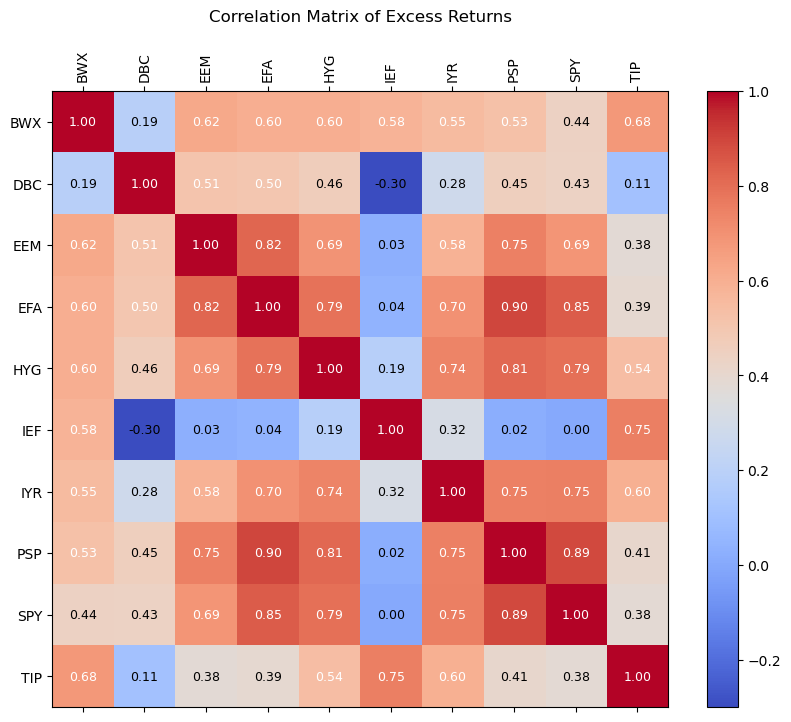

In [66]:
fig, ax = plt.subplots(figsize=(10, 8))
cax = ax.matshow(corr, cmap="coolwarm")

display(corr)
fig.colorbar(cax)

# Set ticks and labels
ax.set_xticks(range(len(corr.columns)))
ax.set_yticks(range(len(corr.columns)))
ax.set_xticklabels(corr.columns, rotation=90)
ax.set_yticklabels(corr.columns)

# Annotate correlation values
for i in range(len(corr)):
    for j in range(len(corr)):
        ax.text(
            j, i, 
            f"{corr.iloc[i, j]:.2f}", 
            ha="center", va="center", 
            color="black" if abs(corr.iloc[i, j]) < 0.5 else "white",
            fontsize=9
        )

plt.title("Correlation Matrix of Excess Returns", pad=20)
plt.show()

In [67]:
corr_pairs = corr.unstack()
corr_pairs = corr_pairs.drop(labels=[(col, col) for col in corr.columns])
sorted_corr = corr_pairs.sort_values()

print("Lowest correlations:")
print(sorted_corr.head())

print("Highest correlations:")
print(sorted_corr.tail())

Lowest correlations:
IEF  DBC   -0.300207
DBC  IEF   -0.300207
SPY  IEF    0.000815
IEF  SPY    0.000815
PSP  IEF    0.022436
dtype: float64
Highest correlations:
SPY  EFA    0.845863
     PSP    0.891687
PSP  SPY    0.891687
EFA  PSP    0.895320
PSP  EFA    0.895320
dtype: float64


The asset pair with the highest correlations is SPY & EFA (0.846), while the pair with the lowest correlation is IEF & DBC (-0.3)

The pair with the smallest magnitude of correlation is SPY & IEF with a coefficient of 0.000815.

TIPS  outperforms both domestic and foreign bonds as proxied through IEF and BWX respectively. Out of all assets with positive annualized excess returns, TIPS only beats IEF, with the former's being 2.05% and the latter's 1.64%. On a risk-adjusted basis, TIPS still outperforms IEF with a sharpe ratio of 0.401 versus 0.016. BWX saw negative excess returns

# MV Frontier

In [68]:
cov = excess_ret.cov() * 12
I = np.eye(cov.shape[0])
inv_cov = np.linalg.solve(cov, I)
mu = annual_mean.to_numpy()
weights = inv_cov @ mu
weights = weights / weights.sum()
weights = pd.Series(weights, index=annual_mean.index)
print("Sorted Tangency Portfolio Weights")
display(weights.sort_values())

Sorted Tangency Portfolio Weights


BWX   -0.850643
PSP   -0.332995
IYR   -0.246582
DBC   -0.071623
EEM    0.026437
EFA    0.068682
TIP    0.175293
HYG    0.290614
IEF    0.881186
SPY    1.059632
dtype: float64

In [69]:
print("Sorted Sharpe Ratios")
display(sharpe.sort_values())

Sorted Sharpe Ratios


BWX   -0.093202
DBC   -0.031774
EEM    0.166542
IEF    0.258569
TIP    0.401091
EFA    0.409372
PSP    0.433804
IYR    0.444143
HYG    0.544873
SPY    0.897103
dtype: float64

/var/folders/w8/x1rpwfh944lbn_nnxkcqkpdm0000gn/T/ipykernel_44567/3786810346.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(compare.index, rotation=45, ha="right")


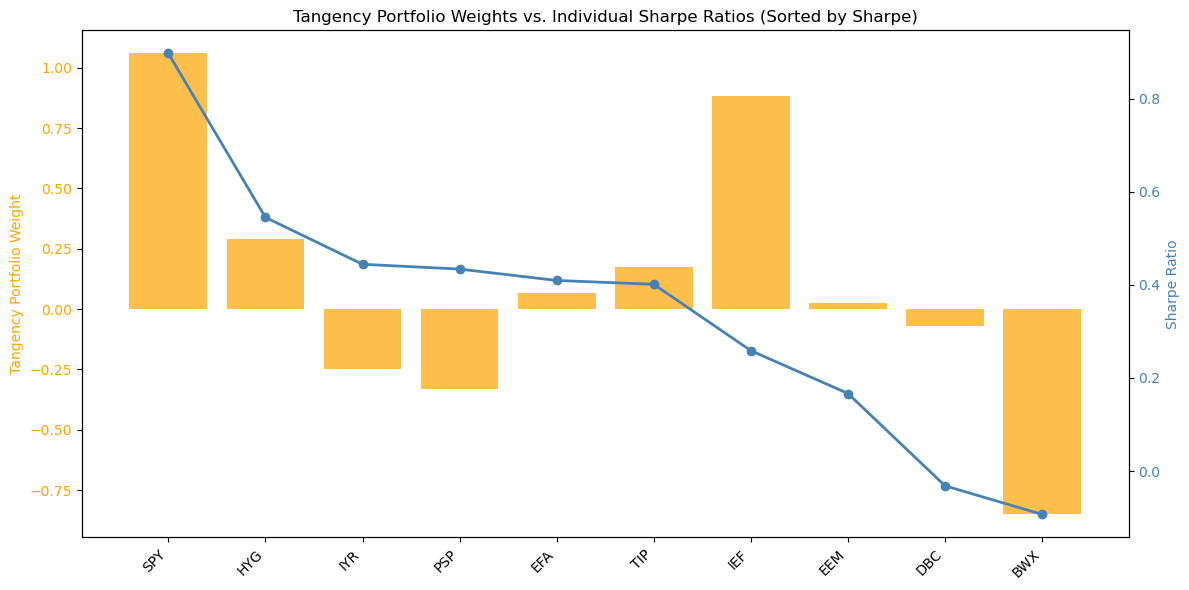

In [70]:
compare = pd.DataFrame({
    "Weight": weights,
    "Sharpe Ratio": sharpe
})

compare = compare.sort_values("Sharpe Ratio", ascending=False)

fig, ax1 = plt.subplots(figsize=(12,6))

# Bar chart for weights
ax1.bar(compare.index, compare["Weight"], color="orange", alpha=0.7, label="Tangency Weight")
ax1.set_ylabel("Tangency Portfolio Weight", color="orange")
ax1.tick_params(axis="y", labelcolor="orange")
ax1.set_xticklabels(compare.index, rotation=45, ha="right")

# Line chart for Sharpe ratios
ax2 = ax1.twinx()
ax2.plot(compare.index, compare["Sharpe Ratio"], color="steelblue", marker="o", linewidth=2, label="Sharpe Ratio")
ax2.set_ylabel("Sharpe Ratio", color="steelblue")
ax2.tick_params(axis="y", labelcolor="steelblue")

plt.title("Tangency Portfolio Weights vs. Individual Sharpe Ratios (Sorted by Sharpe)")
fig.tight_layout()
plt.show()

Besides SPY and BWX, every asset has a different order statistic between their tangency weight and sharpe ratio

In [71]:
tan_mean = weights @ annual_mean
tan_vol = np.sqrt(weights @ cov @ weights)
tan_sharpe = tan_mean/tan_vol
print("Tangency Portfolio Annualized Mean, Volatility, and Sharpe Ratio")
display(tan_mean)
display(tan_vol)
display(tan_sharpe)

Tangency Portfolio Annualized Mean, Volatility, and Sharpe Ratio


0.12852049698605605

0.08747709979095218

1.4691901914122332

# TIPS

In [72]:
# Scenario w/ NO TIPS
no_tips = excess_ret.drop("TIP", axis=1)

no_tips_cov = no_tips.cov() * 12
no_tips_I = np.eye(no_tips_cov.shape[0])
inv_no_tips_cov = np.linalg.solve(no_tips_cov, no_tips_I)
no_tips_mean = no_tips.mean() * 12

no_tips_weights = inv_no_tips_cov @ no_tips_mean
no_tips_weights = no_tips_weights / no_tips_weights.sum()

no_tips_tan_mean = no_tips_weights @ no_tips_mean
no_tips_tan_vol = np.sqrt(no_tips_weights @ no_tips_cov @ no_tips_weights)
no_tips_tan_sharpe = no_tips_tan_mean / no_tips_tan_vol

# Scenario with boosted TIPS excess returns expectation
xtra_tips_mean = annual_mean.copy()
xtra_tips_mean["TIP"] = xtra_tips_mean["TIP"] + 0.0012
# Covariance matrix is unaffected from bumping up the mean, so reuse OG dataframe
xtra_cov = excess_ret.cov() * 12
xtra_I = np.eye(xtra_cov.shape[0])
xtra_cov_inv = np.linalg.solve(xtra_cov, xtra_I)

xtra_tips_weights = xtra_cov_inv @ xtra_tips_mean
xtra_tips_weights = xtra_tips_weights / xtra_tips_weights.sum()

xtra_tips_tan_mean = xtra_tips_weights @ xtra_tips_mean
xtra_tips_tan_vol = np.sqrt(xtra_tips_weights @ xtra_cov @ xtra_tips_weights)
xtra_tips_tan_sharpe = xtra_tips_tan_mean/ xtra_tips_tan_vol


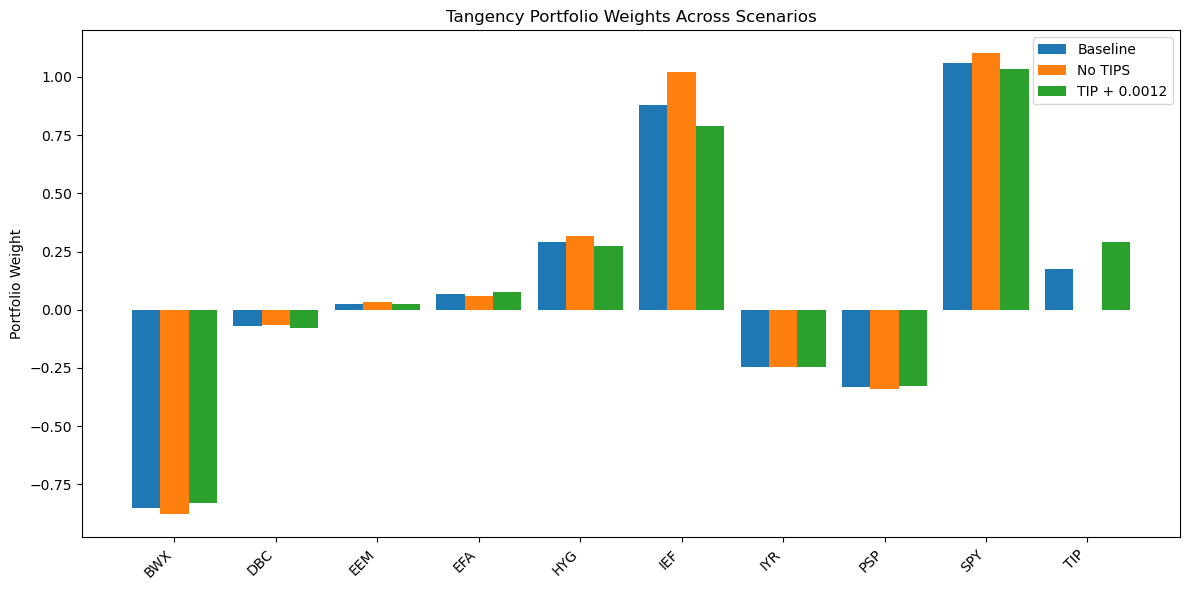

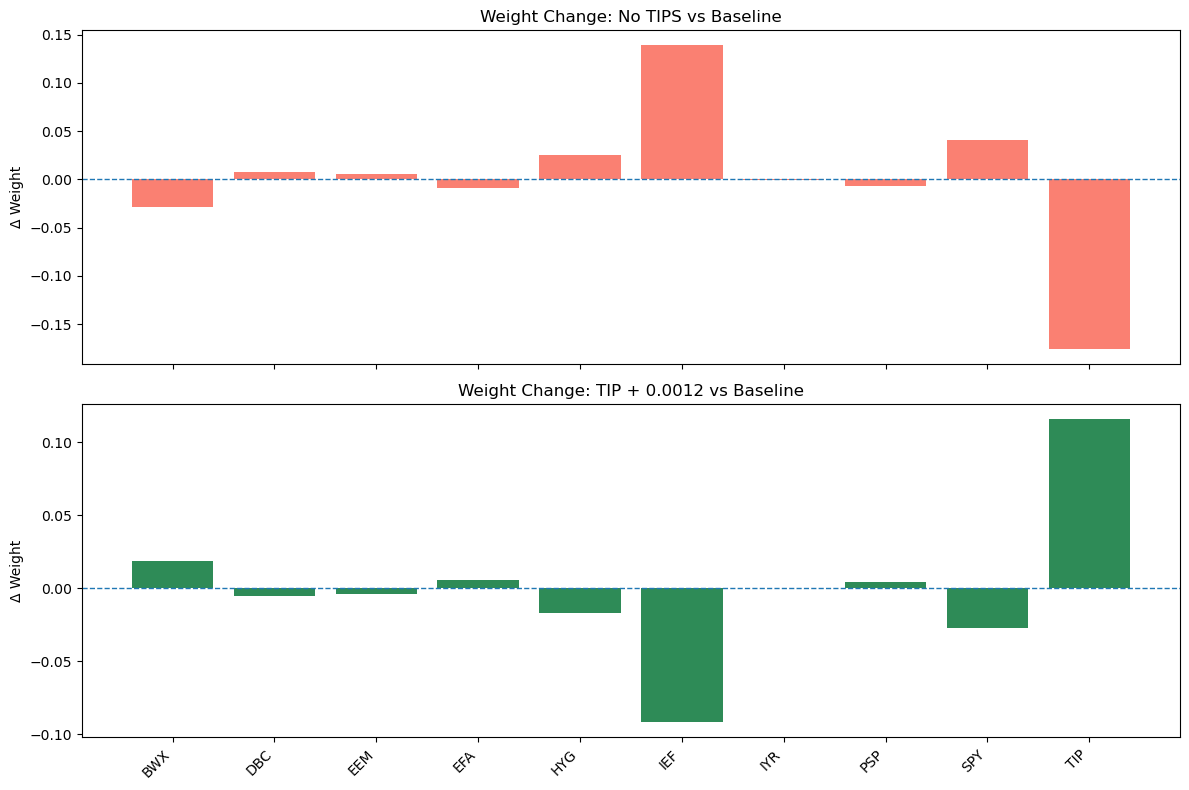

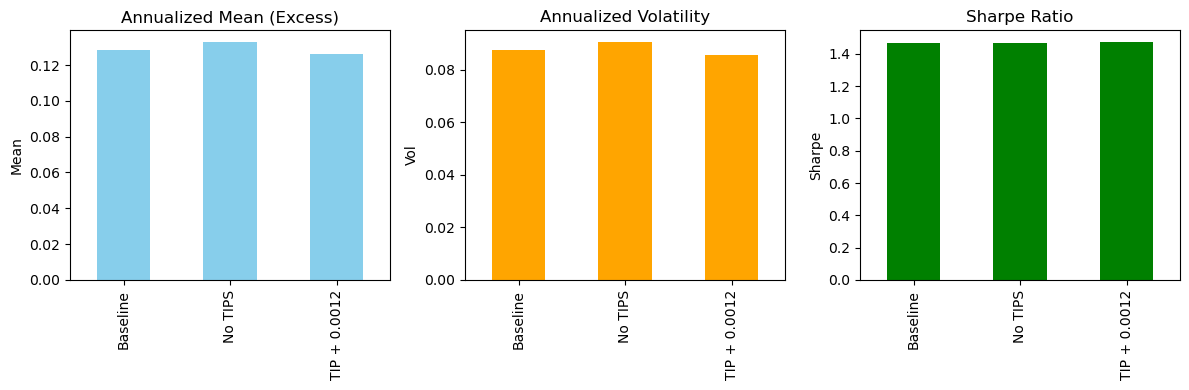

=== Tangency Portfolio Performance (Annualized) ===


,Mean,Vol,Sharpe
Baseline,0.1285,0.0875,1.469
No TIPS,0.1327,0.0905,1.467
TIP + 0.0012,0.1261,0.0856,1.472


In [81]:
# Baseline 
base_w = weights.copy()
base_mean = float(tan_mean)
base_vol  = float(tan_vol)
base_sharpe = float(tan_sharpe)

# No TIPS scenario 
no_tips_w = pd.Series(no_tips_weights, index=no_tips.columns)
no_tips_mean_val   = float(no_tips_tan_mean)
no_tips_vol_val    = float(no_tips_tan_vol)
no_tips_sharpe_val = float(no_tips_tan_sharpe)

# TIPS + 0.0012 scenario 
xtra_w = pd.Series(xtra_tips_weights, index=annual_mean.index)
xtra_mean_val   = float(xtra_tips_tan_mean)
xtra_vol_val    = float(xtra_tips_tan_vol)
xtra_sharpe_val = float(xtra_tips_tan_sharpe)

weights_df = pd.concat(
    [base_w.rename("Baseline"),
     no_tips_w.reindex(base_w.index).rename("No TIPS"),
     xtra_w.rename("TIP + 0.0012")],
    axis=1
).fillna(0.0)

perf = pd.DataFrame({
    "Mean":   [base_mean, no_tips_mean_val, xtra_mean_val],
    "Vol":    [base_vol,  no_tips_vol_val,  xtra_vol_val],
    "Sharpe": [base_sharpe, no_tips_sharpe_val, xtra_sharpe_val]
}, index=["Baseline", "No TIPS", "TIP + 0.0012"])


plt.figure(figsize=(12,6))
x = np.arange(len(weights_df))
w = 0.28
plt.bar(x - w, weights_df["Baseline"], width=w, label="Baseline")
plt.bar(x,       weights_df["No TIPS"], width=w, label="No TIPS")
plt.bar(x + w,   weights_df["TIP + 0.0012"], width=w, label="TIP + 0.0012")
plt.xticks(x, weights_df.index, rotation=45, ha="right")
plt.ylabel("Portfolio Weight")
plt.title("Tangency Portfolio Weights Across Scenarios")
plt.legend()
plt.tight_layout()
plt.show()

delta_nt  = (weights_df["No TIPS"] - weights_df["Baseline"]).rename("No TIPS – Baseline")
delta_xtr = (weights_df["TIP + 0.0012"] - weights_df["Baseline"]).rename("TIP + 0.0012 – Baseline")

fig, axes = plt.subplots(2, 1, figsize=(12,8), sharex=True)
axes[0].bar(weights_df.index, delta_nt, color="salmon")
axes[0].axhline(0, linestyle="--", linewidth=1)
axes[0].set_title("Weight Change: No TIPS vs Baseline")
axes[0].set_ylabel("Δ Weight")

axes[1].bar(weights_df.index, delta_xtr, color="seagreen")
axes[1].axhline(0, linestyle="--", linewidth=1)
axes[1].set_title("Weight Change: TIP + 0.0012 vs Baseline")
axes[1].set_ylabel("Δ Weight")

plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(1, 3, figsize=(12,4))
perf["Mean"].plot(kind="bar", ax=axes[0], color="skyblue")
axes[0].set_title("Annualized Mean (Excess)")
axes[0].set_ylabel("Mean")

perf["Vol"].plot(kind="bar", ax=axes[1], color="orange")
axes[1].set_title("Annualized Volatility")
axes[1].set_ylabel("Vol")

perf["Sharpe"].plot(kind="bar", ax=axes[2], color="green")
axes[2].set_title("Sharpe Ratio")
axes[2].set_ylabel("Sharpe")

plt.tight_layout()
plt.show()

print("=== Tangency Portfolio Performance (Annualized) ===")
display(perf.style.format({"Mean":"{:.4f}", "Vol":"{:.4f}", "Sharpe":"{:.3f}"}))

Removing TIPS from the portfolio increases our annualized mean by only +0.4%, while our Sharpe ratio decreases slightly by -0.002

Surprisingly, increasing TIPS expected annual return decreases our portfolio's mean return. Despite this, the Sharpe ratio improves marginally, suggesting a minimal diversification benefit.

From the weight change plots, we see that our optimizer allocates more towards IEF in the absence of TIPS. Conversely, a higher TIPS expected return shifts weight from IEF to TIPS.

From this analysis, it appears that TIPS provides little to no risk-adjusted benefit towards Harvard's portfolio when treated as its own asset class. The relationship between the weights given to IEF and TIPS between the three scenarios suggests that the portfolio might benefit from combining the two assets into a shared category

# Allocations

In [89]:
def scale_to_target(weights, mu, target):
    scale = target / float(weights @ mu)
    return weights * scale

In [112]:
target = 0.01
mu_m = excess_ret.mean()
cov_m = excess_ret.cov()
var_m = excess_ret.var()
n = len(mu_m)


# Equally-weighted
ew = pd.Series(np.ones(n) / n, index=mu_m.index)
w_ew   = scale_to_target(ew, mu_m, target)

# Risk-parity
rp = (1.0 / var_m)
w_rp   = scale_to_target(rp, mu_m, target)

# Mean-Variance
inv_cov_m = np.linalg.solve(cov_m.to_numpy(), np.eye(n))
mv    = pd.Series(inv_cov_m @ mu_m.to_numpy(), index=mu_m.index)
w_mv      = scale_to_target(mv, mu_m, target)

# Regularized
sigma_D = np.diag(np.diag(cov_m))
sigma_hat = (cov_m.to_numpy() + sigma_D) / 2
reg = np.linalg.solve(sigma_hat, mu_m.to_numpy())
w_reg = scale_to_target(reg, mu_m, target)

# Realized portfolio returns (monthly)
ret_ew = excess_ret @ w_ew
ret_rp = excess_ret @ w_rp
ret_mv = excess_ret @ w_mv
ret_reg = excess_ret @ w_reg


In [113]:
def perf_annual(r):
    mu_ann  = r.mean() * 12.0
    vol_ann = np.sqrt(r.var() * 12)
    sharpe  = mu_ann / vol_ann if vol_ann != 0 else np.nan
    return pd.Series({"Mean": mu_ann, "Vol": vol_ann, "Sharpe": sharpe})

In [115]:
perf = pd.DataFrame({
    "EW":        perf_annual(ret_ew),
    "RP":        perf_annual(ret_rp),
    "MV":        perf_annual(ret_mv),
    "REG":       perf_annual(ret_reg),
}).T

weights = pd.concat([
    w_ew.rename("EW"),
    w_rp.rename("RP (1/Var)"),
    w_mv.rename("MV (Σ⁻¹μ)"),
    w_reg.rename("REG (Σ̂⁻¹μ)")
], axis=1)

display(weights.style.format("{:.4f}"))
display(perf.style.format({"Mean": "{:.4f}", "Vol": "{:.4f}", "Sharpe": "{:.3f}"}))

# Plot weights
plt.figure(figsize=(12,6))
x = np.arange(len(weights.index))
bw = 0.20
plt.bar(x - 1.5*bw, weights["EW"],             width=bw, label="EW")
plt.bar(x - 0.5*bw, weights["RP (1/Var)"],     width=bw, label="RP (1/Var)")
plt.bar(x + 0.5*bw, weights["MV (Σ⁻¹μ)"],     width=bw, label="MV (Σ⁻¹μ)")
plt.bar(x + 1.5*bw, weights["REG (Σ̂⁻¹μ)"],    width=bw, label="REG (Σ̂⁻¹μ)")
plt.xticks(x, weights.index, rotation=45, ha="right")
plt.ylabel("Weight (scaled to monthly target mean = 0.01)")
plt.title("Portfolio Weights by Method (Including Regularized)")
plt.legend()
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(1, 3, figsize=(12,4))
perf["Mean"].plot(kind="bar", ax=axes[0])
axes[0].set_title("Annualized Mean (Excess)"); axes[0].set_ylabel("Mean"); axes[0].set_xlabel("")

perf["Vol"].plot(kind="bar", ax=axes[1])
axes[1].set_title("Annualized Volatility"); axes[1].set_ylabel("Vol"); axes[1].set_xlabel("")

perf["Sharpe"].plot(kind="bar", ax=axes[2])
axes[2].set_title("Sharpe Ratio"); axes[2].set_ylabel("Sharpe"); axes[2].set_xlabel("")

plt.tight_layout()
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'rename'